## Initial Analysis

#### Loading Python Modules:

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sys import argv # argv is a list in Python, which contains the command-line arguments passed to the script.
from class_state_vec import state_vector
from class_obs import obs_da
from class_da_sys import da_system

#### Loading Data from Nature Run:

In [2]:
#-----------------------------------------------------------------------
# Read the Lorenz-96 Nature Run
#-----------------------------------------------------------------------
#infile      = 'lorenz63_run.pkl'
infile      = 'lorenz63_run-001.pkl'  # Qiwen's run

sv          = state_vector()  # create an instance of the state_vector class
sv          = sv.load(infile) # load the state vector from the file

x_nature    = sv.getTrajectory() # get the trajectory of the nature run
#x_nature    = x_nature.T
xdim, maxit = np.shape(x_nature)

x_nature_Q = x_nature

print('xdim = ', xdim)
print('x_nature = ', x_nature)
print('shape of x_nature = ', np.shape(x_nature))

State_Vector Object Created!
State_Vector Object Name:  uninitialized
al:  [0]
t:  [0]
x0:  [0]
xdim =  3
x_nature =  [[ 8.20747939  8.39809589  8.59182394 ... -4.9986383  -4.69976127
  -4.4329259 ]
 [10.0860429  10.31905559 10.5401999  ... -1.85089003 -1.87383032
  -1.92237055]
 [23.86324441 24.07111655 24.31175358 ... 27.47111935 26.83733919
  26.21667603]]
shape of x_nature =  (3, 8000000)


#### Comparing Nature Runs (Qiwen's and mine):

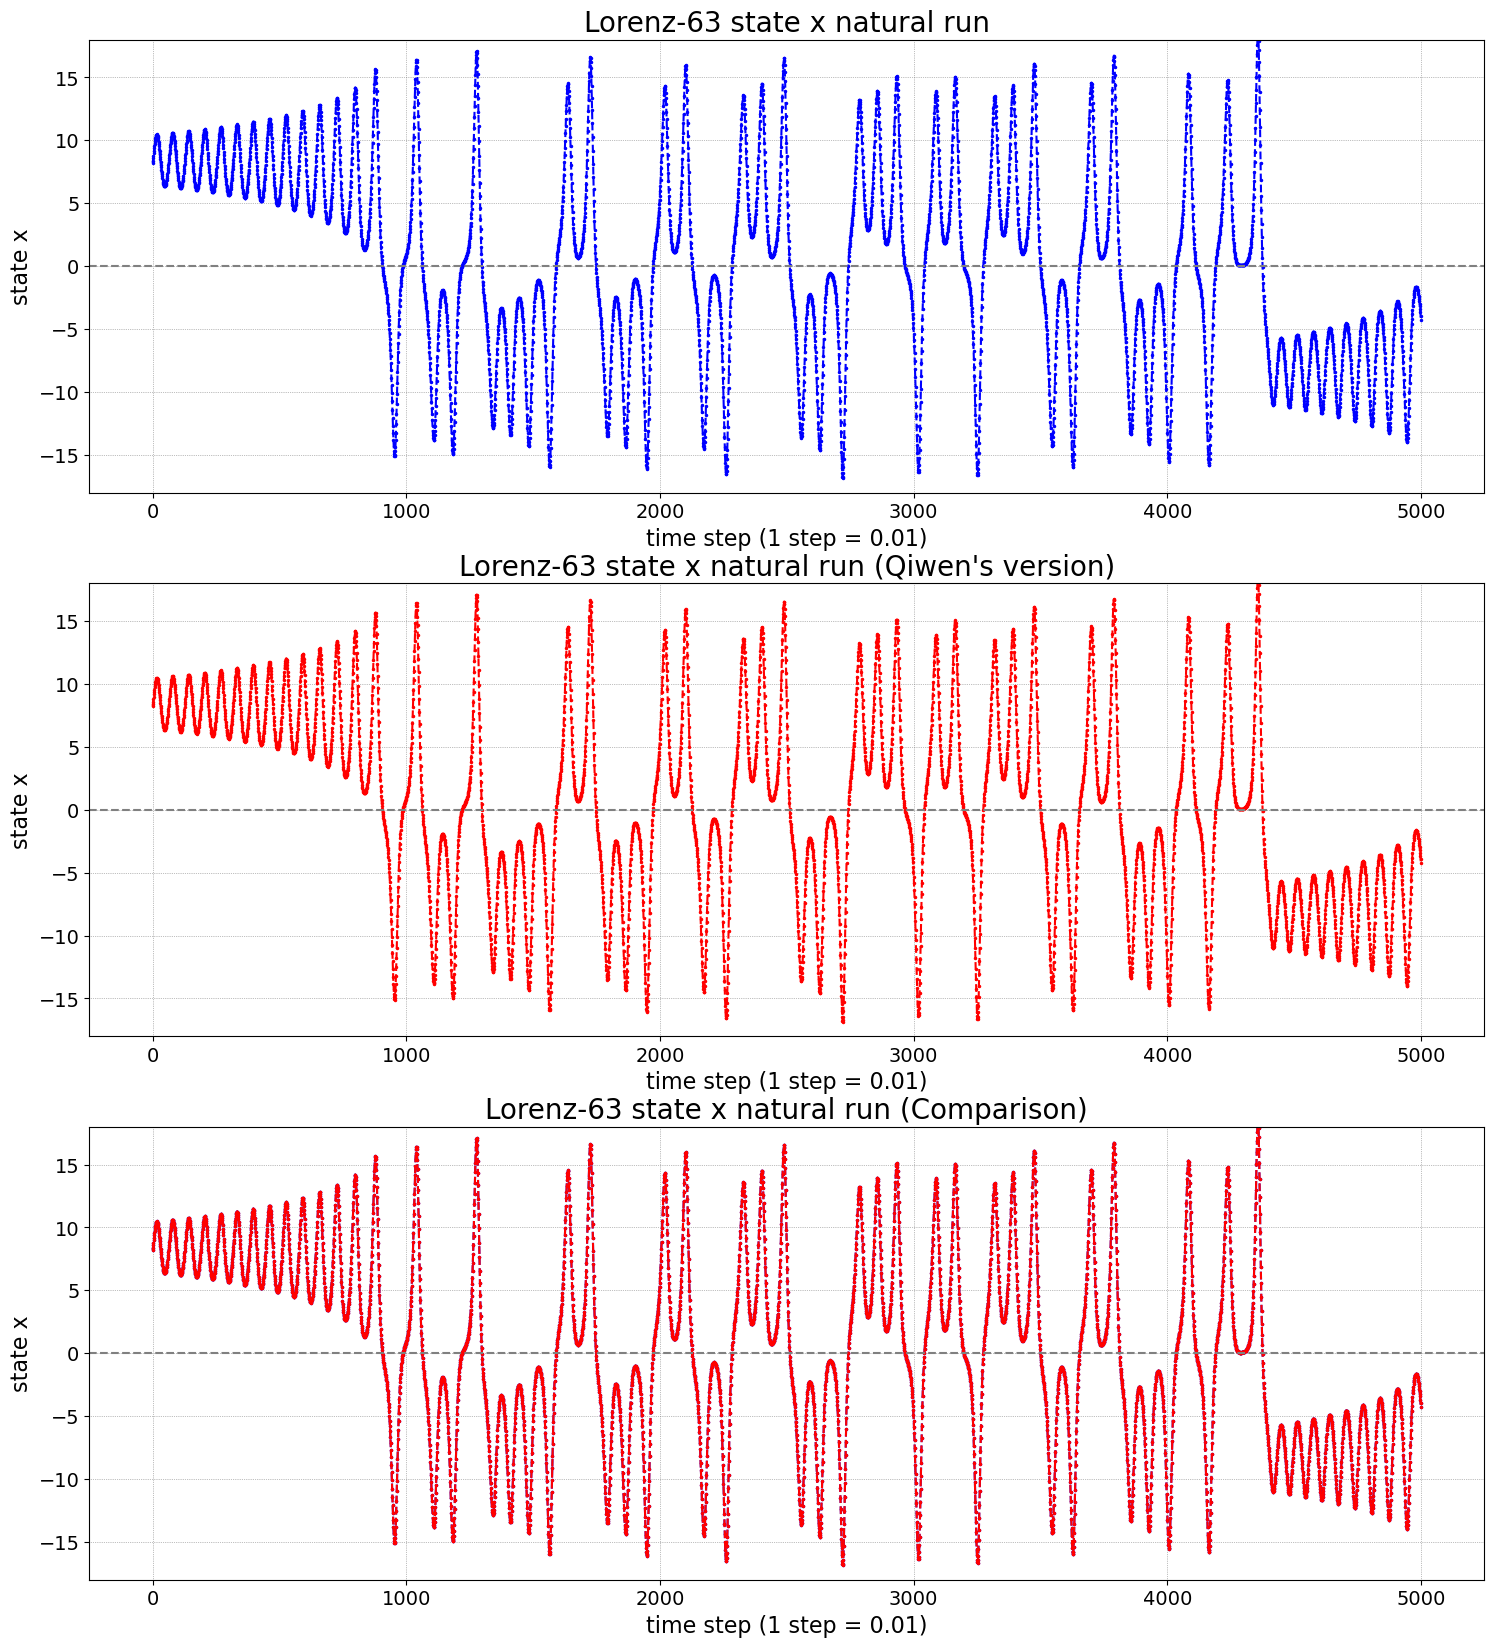

In [3]:
#
# Plot Diego's version:
fig = plt.figure(figsize = (18,20))
ax  = fig.add_subplot(311)
plt.plot(x_nature[0, 0:5000], linestyle = 'dashed',marker='.', markersize = 3, color = 'blue')
plt.axhline(y=0, linestyle='dashed', color = 'grey')
plt.xlabel('time step (1 step = 0.01)', fontsize = 16)
plt.ylabel('state x', fontsize = 16)
plt.title('Lorenz-63 state x natural run', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(-18,18)
plt.grid(color = 'grey', linestyle = ':', linewidth = 0.5)
#
# Plot the Qiwen version:
ax = fig.add_subplot(312)
plt.plot(x_nature_Q[0, 0:5000], linestyle = 'dashed',marker='.', markersize = 3, color = 'red')
plt.axhline(y=0, linestyle='dashed', color = 'grey')
plt.xlabel('time step (1 step = 0.01)', fontsize = 16)
plt.ylabel('state x', fontsize = 16)
plt.title('Lorenz-63 state x natural run (Qiwen\'s version)', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(-18,18)
plt.grid(color = 'grey', linestyle = ':', linewidth = 0.5)
#
# Plot the both versions:
ax = fig.add_subplot(313)
plt.plot(x_nature[0, 0:5000], linestyle = 'dashed',marker='.', markersize = 3, color = 'blue')
plt.plot(x_nature_Q[0, 0:5000], linestyle = 'dashed',marker='.', markersize = 3, color = 'red')
plt.axhline(y=0, linestyle='dashed', color = 'grey')
plt.xlabel('time step (1 step = 0.01)', fontsize = 16)
plt.ylabel('state x', fontsize = 16)
plt.title('Lorenz-63 state x natural run (Comparison)', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(-18,18)
plt.grid(color = 'grey', linestyle = ':', linewidth = 0.5)
#
plt.show()
fig.savefig('lorenz63_NR_Comparison.png')

#### Loading Data from Observations:

In [4]:
#-----------------------------------------------------------------------
# Read the Lorenz-96 observations
#-----------------------------------------------------------------------
infile = 'y_obs.pkl'
obs    = obs_da()
obs    = obs.load(infile)

#-----------------------------------------------------------------------
# Get the observations
#-----------------------------------------------------------------------
y_obs = obs.getVal()
y_pos = obs.getPos()
y_err = obs.getErr()

ydim, ycolumn = np.shape(y_obs)
print('y_obs = ', y_obs)

Obs_DA Object Created!
Obs_DA Object Name:  uninitialized
t:  [0]
pos:  [0]
val:  [0]
err:  [0]
bias:  [0]
xt:  [0]
y_obs =  [[ 7.61809479  8.31852258  5.57078645 ... -7.5718385  -3.11120615
  -4.50616334]
 [ 9.24075185  8.88610517  9.5023434  ... -0.88219755 -0.5128387
  -1.37760787]
 [24.58586441 24.89554633 22.98834913 ... 26.27103631 27.59656942
  25.42050374]]


#### Initialize the DA system:

In [5]:
#-----------------------------------------------------------------------
# Create an instance of the da_system class
#-----------------------------------------------------------------------
das = da_system()         # create an instance of the da_system class
das.setStateVector(sv)    # store the state vector in the da_system class
das.setObsData(obs)       # store the observations in the da_system class
#print(das)
das.xdim = xdim
das.ydim = ydim
das.x0   = x_nature[:,0]  # initial condition
print('x_nature[:,0]: ', x_nature[:,0])
print('x_nature[:,0]: ', x_nature[:,105768])

#das.x0   = x_nature_Q[:,0]  # initial condition
#print('x_nature_Q[:,0]: ', x_nature_Q[:,0])

x_nature[:,0]:  [ 8.20747939 10.0860429  23.86324441]
x_nature[:,0]:  [ 8.01616968  3.56871156 31.47173769]


#### Initialize the Ensemble:

In [6]:
#-----------------------------------------------------------------------
# Set the parameters to create the ensemble:
#-----------------------------------------------------------------------
das.edim           = 3
das.ens_bias_init  = 0
das.ens_sigma_init = np.sqrt(2)

#### Initialize the Error Covariances B and R, and the linearized Observation Operator H:

In [7]:
I = np.identity(xdim)

#-----------------------------------------------------------------------
# Set Background Error Covariance
#-----------------------------------------------------------------------

B = 0 * I     # Background error covariance
das.setB(B)   # store the background error covariance in the da_system class

#-----------------------------------------------------------------------
# Set Observation Error Covariance
#-----------------------------------------------------------------------

R = 2 * I     # Observation error covariance
das.setR(R)   # store the observation error covariance in the da_system class

#-----------------------------------------------------------------------
# Set Linear Observation Operator
#-----------------------------------------------------------------------

H = I
das.setH(H)   # store the observation operator in the da_system


# Print the values of the state vector, observations, and the matrices B, R, and H
print('B = ')
print(das.getB())
print('R = ')
print(das.getR())
print('H = ')
print(das.getH())

B = 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
R = 
[[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 2.]]
H = 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


#### Initialize the timesteps:

In [8]:
#-----------------------------------------------------------------------
# Set time step and number of analysis steps:
#-----------------------------------------------------------------------
t_nature = sv.getTimes()
acyc_step = 8                       # how frequently to perform an analysis
dtau = (t_nature[acyc_step] - t_nature[0])
fcst_step = acyc_step                      # (may need to change for 4D DA methods)
fcst_dt = dtau / fcst_step


#-----------------------------------------------------------------------
# Store basic timing info in the da_system class
#-----------------------------------------------------------------------
das.acyc_step = acyc_step
das.dtau      = dtau
das.fcst_step = fcst_step
das.fcst_dt   = fcst_dt
das.dt        = (t_nature[1] - t_nature[0])
das.maxit     = maxit
das.xdim      = xdim


print('t_nature = ', t_nature)
print('dtau = ', dtau)
print('fcst_dt = ', fcst_dt)
print('dt = ', das.dt)

t_nature =  [0.000000e+00 1.000000e-02 2.000000e-02 ... 7.999997e+04 7.999998e+04
 7.999999e+04]
dtau =  0.08
fcst_dt =  0.01
dt =  0.01


#### Choose DA method:

In [9]:
#-----------------------------------------------------------------------
# Ensemble methods
#-----------------------------------------------------------------------
# EnKF
method = 'EnKF'

# Particle filter
#method='PF'

#-----------------------------------------------------------------------
# 4D methods
#-----------------------------------------------------------------------
# 4D-Var
#method='4DVar'
# 4DEnVar
#method='4DEnVar'
# 4DETKF
#method='4DETKF'


das.setMethod(method)

#### Store DA Object:

In [10]:
#-----------------------------------------------------------------------
# Store information in the da_system class
#-----------------------------------------------------------------------
name    = 'x_analysis_init'
outfile = name+'.pkl'
das.save(outfile)